In [382]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [384]:
data = pd.read_csv("heart_attack.csv")

In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      273 non-null    int64
 1   sex      273 non-null    int64
 2   cp       273 non-null    int64
 3   trtbps   273 non-null    int64
 4   chol     273 non-null    int64
 5   restecg  273 non-null    int64
 6   thalach  273 non-null    int64
 7   output   273 non-null    int64
dtypes: int64(8)
memory usage: 17.2 KB


In [386]:
data.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


In [389]:
data.columns.values

array(['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg', 'thalach',
       'output'], dtype=object)

In [390]:
# cp and rest ecg need to be one-hot encoded into binary form 
data_new = pd.get_dummies(data, columns =['restecg'], drop_first = True)
data = pd.get_dummies(data_new, columns=['cp'], drop_first = True)
data

,age,sex,trtbps,chol,thalach,output,restecg_1,restecg_2,cp_1,cp_2,cp_3
0,63,1,145,233,150,1,0,0,0,0,1
1,37,1,130,250,187,1,1,0,0,1,0
2,56,1,120,236,178,1,1,0,1,0,0
3,57,0,120,354,163,1,1,0,0,0,0
4,57,1,140,192,148,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
268,59,1,164,176,90,0,0,0,0,0,0
269,57,0,140,241,123,0,1,0,0,0,0
270,45,1,110,264,132,0,1,0,0,0,1
271,68,1,144,193,141,0,1,0,0,0,0


In [395]:
# spliting the data into test and train dataset 

target = data['output']
inputs = data.drop(['output'], axis =1)
inputs

,age,sex,trtbps,chol,thalach,restecg_1,restecg_2,cp_1,cp_2,cp_3
0,0.945954,1,0.730199,-0.264149,0.023843,0,0,0,0,1
1,-1.896714,1,-0.118797,0.059825,1.618801,1,0,0,1,0
2,0.180620,1,-0.684795,-0.206978,1.230838,1,0,1,0,0
3,0.289954,0,-0.684795,2.041783,0.584234,1,0,0,0,0
4,0.289954,1,0.447201,-1.045498,-0.062371,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
268,0.508621,1,1.805595,-1.350415,-2.562575,0,0,0,0,0
269,0.289954,0,0.447201,-0.111691,-1.140045,1,0,0,0,0
270,-1.022047,1,-1.250793,0.326627,-0.752082,1,0,0,0,1
271,1.492621,1,0.673600,-1.026441,-0.364120,1,0,0,0,0


In [396]:
# normalising the data 
inputs = (inputs - np.min(inputs))/ (np.max(inputs) - np.min(inputs)).values

In [397]:
X_train, X_test, y_train, y_test = train_test_split(
             inputs, data['output'], test_size = 0.2, random_state=50)

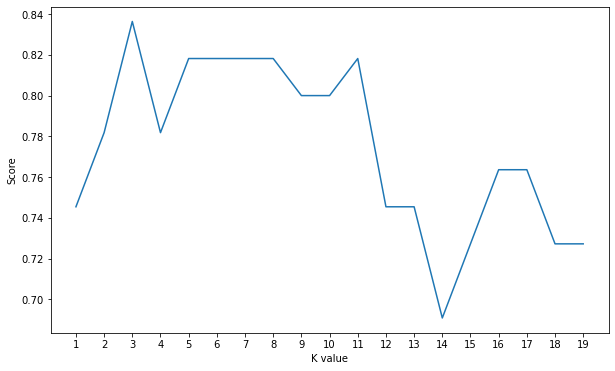

Maximum KNN Score is 83.64%


In [400]:
accuracy = {}
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracy['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

Text(0, 0.5, 'Error Rate')

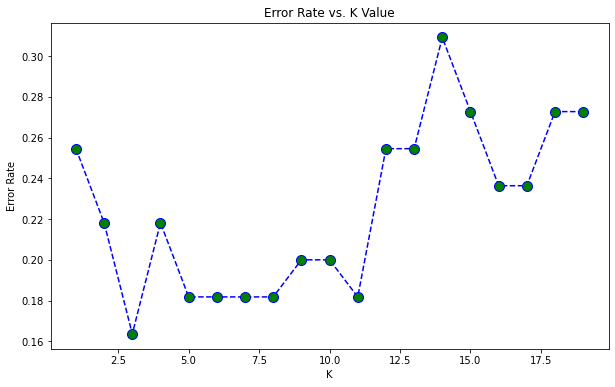

In [421]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [420]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=11')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=11


[[19  5]
 [ 5 26]]


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.84      0.84      0.84        31

    accuracy                           0.82        55
   macro avg       0.82      0.82      0.82        55
weighted avg       0.82      0.82      0.82        55



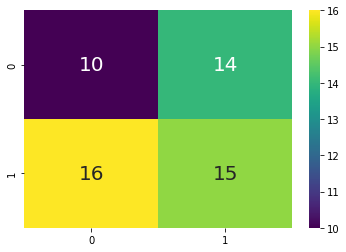

In [422]:
clf=KNeighborsClassifier(n_neighbors=11)
clf.fit(x_train,y_train)
predicted_value=clf.predict(x_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cmap="viridis")
plt.show()